✅ Successfully loaded dataset.

🔄 Starting data preprocessing...
✅ Data preprocessing complete.

PART 1: REGRESSION ANALYSIS (Predicting Production)


C:\Users\12san\AppData\Local\Temp\ipykernel_15432\3795307520.py:55: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
C:\Users\12san\AppData\Local\Temp\ipykernel_15432\3795307520.py:57: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex


--- RandomForest Regressor ---
R²: 0.984
MAE: 2,551.44

--- KNN Regressor ---
R²: 0.977
MAE: 3,172.66

✅ RandomForest Regressor trained for Productivity.

PART 2: CLASSIFICATION ANALYSIS (Production Category)

--- RandomForest Classifier ---
Accuracy: 94.22%
F1 Score: 0.942


C:\Users\12san\AppData\Local\Temp\ipykernel_15432\3795307520.py:125: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(class_f1_scores.keys()), y=list(class_f1_scores.values()), palette='viridis')


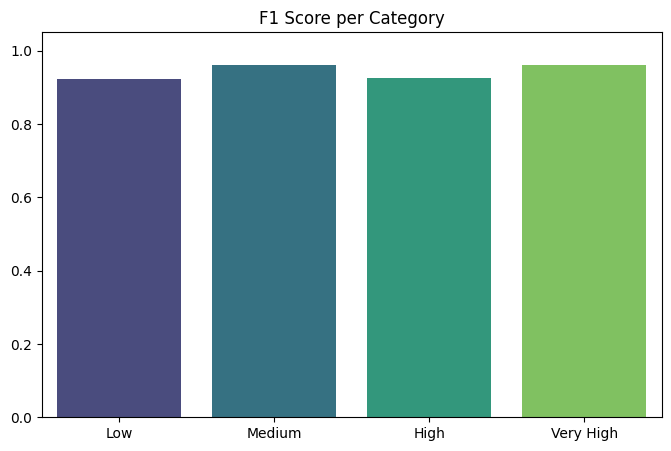

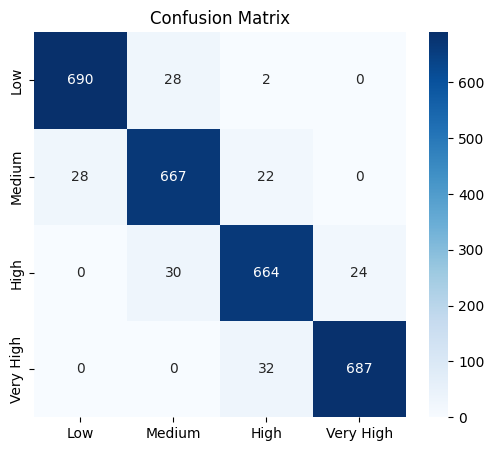

Dropdown(description='District:', options=('Alappuzha', 'Ernakulam', 'Idukki', 'Kannur', 'Kasaragod', 'Kollam'…

Dropdown(description='Crop:', options=('Arecanut', 'Banana', 'Betel leaves', 'Cardamom', 'Cashew', 'Cloves', '…

FloatText(value=1.0, description='Area (Ha):')

Button(description='Predict', style=ButtonStyle())

In [9]:
# --- IMPORTS ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score, f1_score, classification_report, confusion_matrix

import ipywidgets as widgets
from IPython.display import display

# --- FUNCTION: PREDICT PRODUCTIVITY ---
def predict_upcoming_productivity(district, crop, area, model, training_columns):
    upcoming_year = 2024  # Predict for upcoming year
    input_data = pd.DataFrame({
        'District': [district],
        'Crop': [crop],
        'Area': [area],
        'Year': [upcoming_year]
    })

    # One-hot encode
    input_processed = pd.get_dummies(input_data)
    input_aligned = input_processed.reindex(columns=training_columns, fill_value=0)

    # Predict
    predicted_productivity = model.predict(input_aligned)

    print("\n" + "="*50)
    print("PART 3: UPCOMING PRODUCTIVITY PREDICTION")
    print("="*50)
    print(f"\n➡️ Prediction for Year {upcoming_year}:")
    print(f"   - District: {district}")
    print(f"   - Crop: {crop}")
    print(f"   - Area: {area} Hectares")
    print("--------------------------------------------------")
    print(f"   Predicted Productivity: {predicted_productivity[0]:.2f} Kg/Hectare")
    print("==================================================")

# --- FUNCTION: RUN FULL ANALYSIS ---
def run_comprehensive_analysis(file_path='dataset.csv'):
    try:
        df = pd.read_csv(file_path)
        print("✅ Successfully loaded dataset.")

        # --- Preprocessing ---
        print("\n🔄 Starting data preprocessing...")
        df['Year'] = df['Agriculture Year'].apply(lambda x: int(str(x).split('-')[0]))
        df.dropna(subset=['Production', 'Productivity'], inplace=True)

        for col in ['District', 'Crop']:
            if col in df.columns:
                df[col].fillna(df[col].mode()[0], inplace=True)
        if 'Area' in df.columns:
            df['Area'].fillna(df['Area'].mean(), inplace=True)

        categorical_cols = ['District', 'Crop']
        if 'Season' in df.columns:
            categorical_cols.append('Season')
        df_processed = pd.get_dummies(df.copy(), columns=categorical_cols, drop_first=True)
        print("✅ Data preprocessing complete.")

        # --- Regression (Production) ---
        cols_to_drop = ['Production', 'Agriculture Year', 'Area Unit', 'Production Unit',
                        'Productivity Unit', 'Productivity']
        X = df_processed.drop(columns=[c for c in cols_to_drop if c in df_processed.columns])
        y_reg = df_processed['Production']
        X_train, X_test, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)

        print("\n" + "="*50)
        print("PART 1: REGRESSION ANALYSIS (Predicting Production)")
        print("="*50)

        # RandomForest Regressor
        rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
        rf_regressor.fit(X_train, y_train_reg)
        rf_predictions = rf_regressor.predict(X_test)
        print("\n--- RandomForest Regressor ---")
        print(f"R²: {r2_score(y_test_reg, rf_predictions):.3f}")
        print(f"MAE: {mean_absolute_error(y_test_reg, rf_predictions):,.2f}")

        # KNN Regressor
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        knn_regressor = KNeighborsRegressor(n_neighbors=5, n_jobs=-1)
        knn_regressor.fit(X_train_scaled, y_train_reg)
        knn_predictions = knn_regressor.predict(X_test_scaled)
        print("\n--- KNN Regressor ---")
        print(f"R²: {r2_score(y_test_reg, knn_predictions):.3f}")
        print(f"MAE: {mean_absolute_error(y_test_reg, knn_predictions):,.2f}")

        # --- Regression (Productivity) ---
        y_prod = df_processed['Productivity']
        X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X, y_prod, test_size=0.2, random_state=42)
        rf_productivity_regressor = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
        rf_productivity_regressor.fit(X_train_p, y_train_p)
        print("\n✅ RandomForest Regressor trained for Productivity.")

        # --- Classification (Production Category) ---
        print("\n" + "="*50)
        print("PART 2: CLASSIFICATION ANALYSIS (Production Category)")
        print("="*50)

        bin_labels = ['Low', 'Medium', 'High', 'Very High']
        df['Production_Category'] = pd.qcut(df['Production'], q=4, labels=bin_labels, duplicates='drop')
        y_clf = df_processed.join(df['Production_Category'])['Production_Category']
        X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
            X, y_clf, test_size=0.2, random_state=42, stratify=y_clf
        )

        rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
        rf_classifier.fit(X_train_clf, y_train_clf)
        clf_predictions = rf_classifier.predict(X_test_clf)
        print("\n--- RandomForest Classifier ---")
        print(f"Accuracy: {accuracy_score(y_test_clf, clf_predictions):.2%}")
        print(f"F1 Score: {f1_score(y_test_clf, clf_predictions, average='weighted'):.3f}")

        # Visualizations
        report_dict = classification_report(y_test_clf, clf_predictions, target_names=bin_labels, output_dict=True)
        class_f1_scores = {label: report_dict[label]['f1-score'] for label in bin_labels}
        plt.figure(figsize=(8, 5))
        sns.barplot(x=list(class_f1_scores.keys()), y=list(class_f1_scores.values()), palette='viridis')
        plt.title('F1 Score per Category')
        plt.ylim(0, 1.05)
        plt.show()

        cm = confusion_matrix(y_test_clf, clf_predictions, labels=bin_labels)
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=bin_labels, yticklabels=bin_labels)
        plt.title('Confusion Matrix')
        plt.show()

        return rf_productivity_regressor, X.columns, df

    except Exception as e:
        print(f"❌ Error: {e}")
        return None, None, None

# --- RUN ANALYSIS ---
productivity_model, model_columns, df_options = run_comprehensive_analysis("dataset.csv")

# --- WIDGETS FOR INTERACTIVE PREDICTION ---
if productivity_model is not None:
    unique_districts = sorted(df_options['District'].unique())
    unique_crops = sorted(df_options['Crop'].unique())

    district_dropdown = widgets.Dropdown(options=unique_districts, description="District:")
    crop_dropdown = widgets.Dropdown(options=unique_crops, description="Crop:")
    area_input = widgets.FloatText(value=1.0, description="Area (Ha):")
    button = widgets.Button(description="Predict")

    def on_predict_clicked(b):
        predict_upcoming_productivity(
            district=district_dropdown.value,
            crop=crop_dropdown.value,
            area=area_input.value,
            model=productivity_model,
            training_columns=model_columns
        )

    button.on_click(on_predict_clicked)
    display(district_dropdown, crop_dropdown, area_input, button)


In [10]:
import joblib

# Make sure dataset has 'Production' and 'Value' or something similar for calculating price.
# Example: price_per_kg = Value / Production

if "Value" in df_options.columns and "Production" in df_options.columns:
    df_options["Price_per_kg"] = df_options["Value"] / df_options["Production"]
    crop_prices = df_options.groupby("Crop")["Price_per_kg"].mean().to_dict()
else:
    # fallback: assume Value is missing, set None
    crop_prices = {}

# Save the model and columns
joblib.dump(productivity_model, "productivity_model.pkl")
joblib.dump(model_columns, "model_columns.pkl")
joblib.dump(crop_prices, "crop_prices.pkl")   # ✅ save crop prices


['crop_prices.pkl']